In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
import numpy as np
%matplotlib inline

from statsmodels.api import tsa
from dateutil.parser import parse

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
amzn = data.DataReader('AMZN', start='2015', end='2019',
                      data_source='yahoo')

amzn.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,314.750000,306.959991,312.579987,308.519989,2783200,308.519989
2015-01-05,308.380005,300.850006,307.010010,302.190002,2774200,302.190002
2015-01-06,303.000000,292.380005,302.239990,295.290009,3519000,295.290009
2015-01-07,301.279999,295.329987,297.500000,298.420013,2640300,298.420013
2015-01-08,303.140015,296.109985,300.320007,300.459991,3088400,300.459991


In [3]:
goog = data.DataReader('GOOG', start='2015', end='2019',
                      data_source='yahoo')

goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,528.362366,521.231628,526.114746,521.937744,1447600.0,521.937744
2015-01-05,521.460388,510.252045,520.396240,511.057617,2059800.0,511.057617
2015-01-06,513.350037,498.307800,512.181458,499.212799,2899900.0,499.212799
2015-01-07,504.467896,496.915436,504.225220,498.357513,2065100.0,498.357513
2015-01-08,500.724487,488.312805,495.264526,499.928864,3353600.0,499.928864


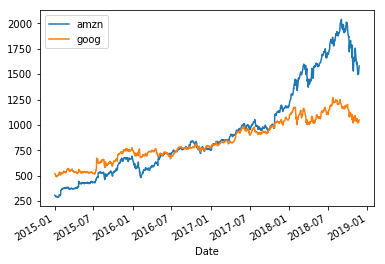

In [4]:
amzn['Close'].plot(label='amzn')
goog['Close'].plot(label='goog')
plt.legend()

In [5]:
amzn_max_val = amzn['Close'].max()
print("Amazon highest 2018 close: {} on {}".format(amzn_max_val, amzn['Close']['2018'].argmax()))

Amazon highest 2018 close: 2039.510009765625 on 2018-09-04 00:00:00


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


In [6]:
goog_max_val = goog['Close'].max()
print("Google highest 2018 close: {} on {}".format(goog_max_val, goog['Close']['2018'].argmax()))

Google highest 2018 close: 1268.3299560546875 on 2018-07-26 00:00:00


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


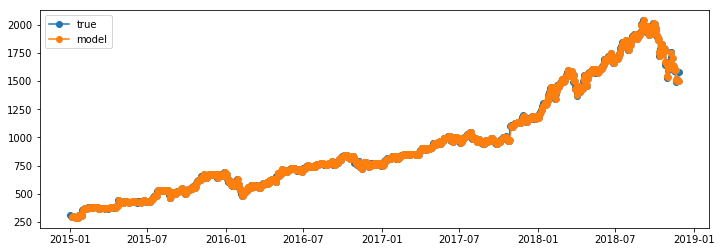

In [7]:
amzn_close = amzn['Close']
arma = tsa.ARMA(amzn_close, order=(3,3))
arma_result = arma.fit()
prediction = arma_result.predict(start=3)

plt.figure(figsize=(12,4))
plt.plot(amzn_close, '-o', label='true')
plt.plot(prediction, '-o', label='model')
plt.legend();

In [8]:
print('MAE = {0:.3f}'.format(mean_absolute_error(amzn_close[3:], prediction)))

MAE = 11.511
